In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b>Reading Data

In [4]:
#importing the data set
diabetes_data=pd.read_csv('diabetes.csv')

In [5]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Many columns in the give data have 0's as their values, so the data has to be cleaned and processed. 


The below cell shows how many zeros are present in each feature

In [6]:
(diabetes_data[:]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

<b>Splitting the dataset into training(60%), validation(20%) and test data(20%)

In [7]:
train_data, test_data, validation_data  = np.split( diabetes_data.sample(frac=1,random_state=69), [int(.6*len(diabetes_data)), int(.8*len(diabetes_data))])

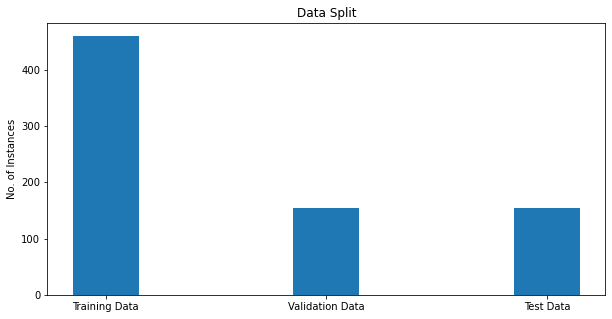

In [8]:
data = {'Training Data':len(train_data), 'Validation Data':len(validation_data), 'Test Data':len(test_data)}
Data_split = list(data.keys())
accuracy_split = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(Data_split, accuracy_split,
        width = 0.3)
plt.ylabel("No. of Instances")
plt.title("Data Split")
plt.show()

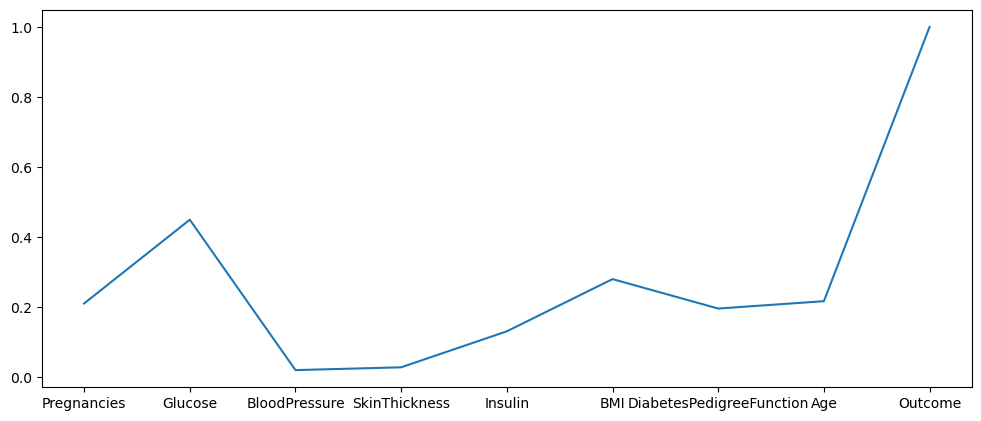

In [9]:
#Represents a correlation between all the features
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train_data.corr()['Outcome'])

<b>Imputation: Replacing the 0 values with the mean of the Traing data for respective features

In [10]:
import math
train_data_mean=train_data.copy()
validation_data_mean=validation_data.copy()
test_data_mean=test_data.copy()

mean_insulin=train_data_mean['Insulin'].mean()
mean_Glucose=train_data_mean['Glucose'].mean()
mean_BloodPressure=train_data_mean['BloodPressure'].mean()
mean_SkinThickness=train_data_mean['SkinThickness'].mean()
mean_BMI=train_data_mean['BMI'].mean()
mean_Pregnancies=math.floor(train_data_mean['Pregnancies'].mean())

train_data_mean.loc[train_data_mean['Insulin'] == 0, 'Insulin'] = mean_insulin
train_data_mean.loc[train_data_mean['Glucose'] == 0, 'Glucose'] = mean_Glucose
train_data_mean.loc[train_data_mean['BloodPressure'] == 0, 'BloodPressure'] = mean_BloodPressure
train_data_mean.loc[train_data_mean['SkinThickness'] == 0, 'SkinThickness'] = mean_SkinThickness
train_data_mean.loc[train_data_mean['BMI'] == 0, 'BMI'] = mean_BMI
train_data_mean.loc[train_data_mean['Pregnancies'] == 0, 'Pregnancies'] = mean_Pregnancies

validation_data_mean.loc[validation_data_mean['Insulin'] == 0, 'Insulin'] = mean_insulin
validation_data_mean.loc[validation_data_mean['Glucose'] == 0, 'Glucose'] = mean_Glucose
validation_data_mean.loc[validation_data_mean['BloodPressure'] == 0, 'BloodPressure'] = mean_BloodPressure
validation_data_mean.loc[validation_data_mean['SkinThickness'] == 0, 'SkinThickness'] = mean_SkinThickness
validation_data_mean.loc[validation_data_mean['BMI'] == 0, 'BMI'] = mean_BMI
validation_data_mean.loc[validation_data_mean['Pregnancies'] == 0, 'Pregnancies'] = mean_Pregnancies

test_data_mean.loc[test_data_mean['Insulin'] == 0, 'Insulin'] = mean_insulin
test_data_mean.loc[test_data_mean['Glucose'] == 0, 'Glucose'] = mean_Glucose
test_data_mean.loc[test_data_mean['BloodPressure'] == 0, 'BloodPressure'] = mean_BloodPressure
test_data_mean.loc[test_data_mean['SkinThickness'] == 0, 'SkinThickness'] = mean_SkinThickness
test_data_mean.loc[test_data_mean['BMI'] == 0, 'BMI'] = mean_BMI
test_data_mean.loc[test_data_mean['Pregnancies'] == 0, 'Pregnancies'] = mean_Pregnancies


<b>As the data is normalized the corelation between the features increases

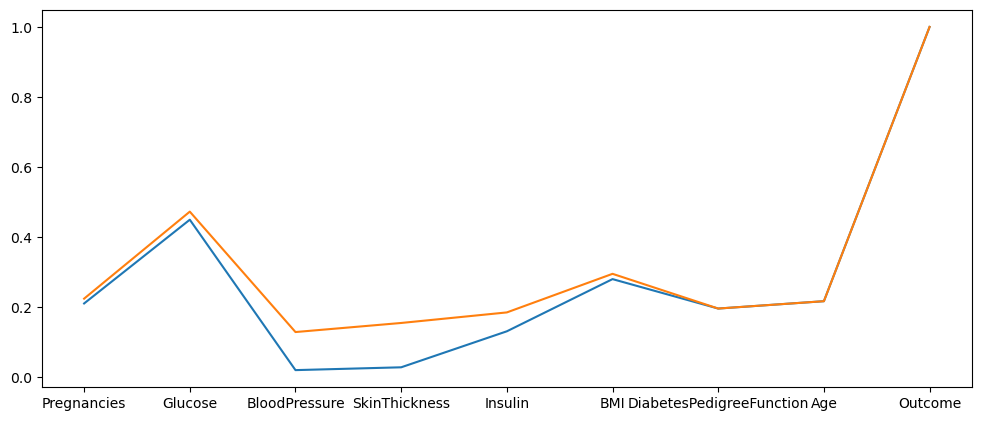

In [11]:
#Shows the increase in correlation between the features
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train_data.corr()['Outcome'])
plt.plot(train_data_mean.corr()['Outcome'])

If we observe the feature values are at different ranges, so normalizing the data would help the model. After normalization the data in every column will be between 0 and 1 

In [12]:
#Normalize
train_data_norm=train_data_mean.copy()
validation_data_norm=validation_data_mean.copy()
test_data_norm=test_data_mean.copy()
for i in train_data_norm.columns[:-1]:
    validation_data_norm[i]=(validation_data_norm[i]-train_data_norm[i].min())/(train_data_norm[i].max()-train_data_norm[i].min())
    test_data_norm[i]=(test_data_norm[i]-train_data_norm[i].min())/(train_data_norm[i].max()-train_data_norm[i].min())
    train_data_norm[i]=(train_data_norm[i]-train_data_norm[i].min())/(train_data_norm[i].max()-train_data_norm[i].min())

train_data_norm_X=train_data_norm.drop('Outcome',axis=1)
#train_data_norm_y=np.asmatrix(train_data_norm['Outcome'].values).T
train_data_norm_y=train_data_norm.iloc[:, -1]

validation_data_norm_X=validation_data_norm.drop('Outcome',axis=1)
validation_data_norm_y=validation_data_norm.iloc[:, -1]

test_data_norm_X=test_data_norm.drop('Outcome',axis=1)
test_data_norm_y=test_data_norm.iloc[:, -1]

In [13]:
#Sigmoid function
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [14]:
#cost function: log loss
def cost_func(y,z):
    return -sum((y*np.log(z))+((1-y)*np.log(1-z)))/len(y)
    

In [15]:
def Logistic_reg(itr,learning_rate):
    weights=np.zeros(8)
    cnst=0.1
    print("iterations: ",itr,"\n learning rate: ",learning_rate)
    for i in range(itr):
        z=np.dot(train_data_norm_X,weights)+cnst
        target_pred=sigmoid(z)
        loss=cost_func(train_data_norm_y,target_pred)
        gradient_weights=np.dot(train_data_norm_X.T,(target_pred-train_data_norm_y))/train_data_norm_X.shape[0]
        gradient_cnst=np.mean(target_pred-train_data_norm_y)
        weights=weights-learning_rate*gradient_weights
        cnst=cnst-learning_rate*gradient_cnst
        loss_stored.append(loss)
        
        z_val=np.dot(validation_data_norm_X,weights)+cnst
        target_pred_val=sigmoid(z_val)
        loss_val=cost_func(validation_data_norm_y,target_pred_val)
        loss_stored_val.append(loss_val)
    plt.plot(loss_stored, label='training_loss')
    plt.plot(loss_stored_val,label='validation_loss')
    plt.legend()
    plt.show()
    print(" Training_loss  ",loss_stored[-1],"\n Validation_loss  ",loss_stored_val[-1])

<b>Hyper parameter tuning by comparing loss.

iterations:  3000 
 learning rate:  0.1


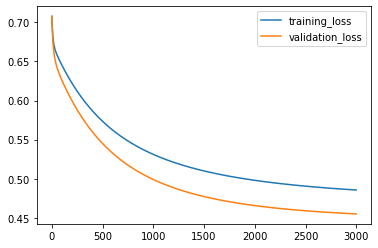

 Training_loss   0.48555544030413894 
 Validation_loss   0.45497897933916437
iterations:  10000 
 learning rate:  0.1


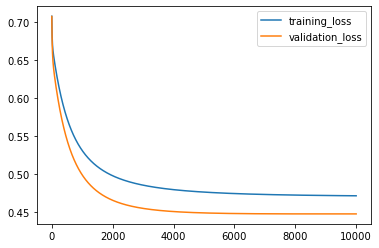

 Training_loss   0.4715777075852963 
 Validation_loss   0.44773311172102254
iterations:  15000 
 learning rate:  0.1


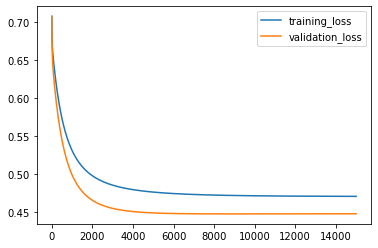

 Training_loss   0.4708261032615851 
 Validation_loss   0.4479165031752741
iterations:  3000 
 learning rate:  0.05


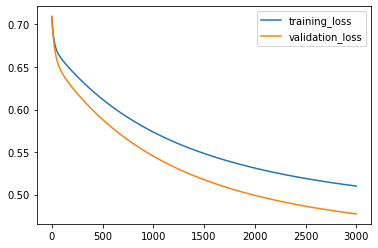

 Training_loss   0.5099713109395076 
 Validation_loss   0.477222420890095
iterations:  10000 
 learning rate:  0.05


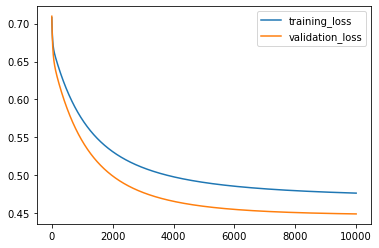

 Training_loss   0.4764317216290047 
 Validation_loss   0.44902377865873977
iterations:  15000 
 learning rate:  0.05


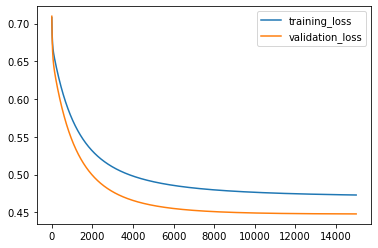

 Training_loss   0.472852547941073 
 Validation_loss   0.44779641354619676
iterations:  3000 
 learning rate:  0.06


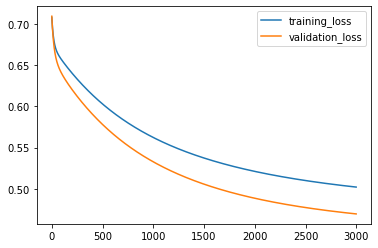

 Training_loss   0.5020381153674213 
 Validation_loss   0.4694825196650455
iterations:  10000 
 learning rate:  0.06


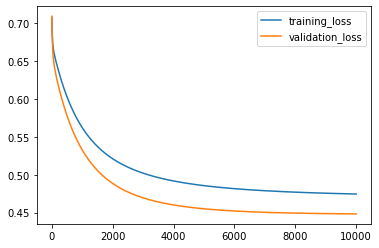

 Training_loss   0.4745081559186435 
 Validation_loss   0.4482264702820174
iterations:  15000 
 learning rate:  0.06


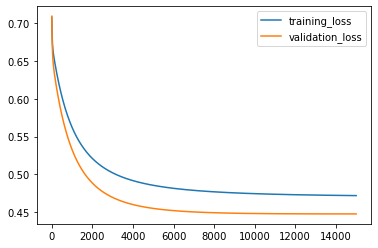

 Training_loss   0.471951692086817 
 Validation_loss   0.4477170327051305


In [16]:
iterations = [3000,10000,15000]
learning_rates = [0.1, 0.05, 0.06]
for l in learning_rates:
    for itr in iterations:
        loss_stored = []
        loss_stored_val = []
        Logistic_reg(itr, l)

<b>From the above observations, 10000 iterations and 0.1 learning rate is giving less loss.
    
    1.Training the model with the parameters identified during tuning.
    2.Graph to represent Training and validation loss.

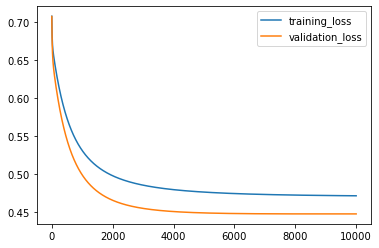

Plot to represent Training and Validation loss
 Training_loss   0.4715777075852963 
 Validation_loss   0.44773311172102254


In [17]:
# LR 
loss_stored=[]
loss_stored_val = []
learning_rate =0.1
weights=np.zeros(8)
cnst=0.1
for i in range(10000):
    z=np.dot(train_data_norm_X,weights)+cnst
    target_pred=sigmoid(z)
    loss=cost_func(train_data_norm_y,target_pred)
    gradient_weights=np.dot(train_data_norm_X.T,(target_pred-train_data_norm_y))/train_data_norm_X.shape[0]
    gradient_cnst=np.mean(target_pred-train_data_norm_y)
    weights=weights-learning_rate*gradient_weights
    cnst=cnst-learning_rate*gradient_cnst
    loss_stored.append(loss)
    
    z_val=np.dot(validation_data_norm_X,weights)+cnst
    target_pred_val=sigmoid(z_val)
    loss_val=cost_func(validation_data_norm_y,target_pred_val)
    loss_stored_val.append(loss_val)
plt.plot(loss_stored, label='training_loss')
plt.plot(loss_stored_val,label='validation_loss')
plt.legend()
plt.show()
print('Plot to represent Training and Validation loss')
print(" Training_loss  ",loss_stored[-1],"\n Validation_loss  ",loss_stored_val[-1])


<b>Functions to calculate accuracy

In [18]:
def predict(X,w,c):
    for i in range (len(X)):
        r=sigmoid(np.dot(X,w)+c)
        y_predicted=[1 if i > 0.5 else 0 for i in r]
        return np.array(y_predicted)
    
def predicted_accuracy(actual_data_y,pred_data_y):
    prob=np.sum(actual_data_y==pred_data_y)/len(actual_data_y)
    return prob

<b>Calculating Training, validation accuracy.

In [19]:
#Train data accuracy
y_predicted=predict(train_data_norm_X,weights,cnst)
train_accuracy=predicted_accuracy(train_data_norm_y,y_predicted)*100
print("Taining data accuracy: ",train_accuracy)

#Validation data accuracy
y_predicted=predict(validation_data_norm_X,weights,cnst)
validation_accuracy=predicted_accuracy(validation_data_norm_y,y_predicted)*100
print("Validation data accuracy: ",validation_accuracy)


Taining data accuracy:  77.39130434782608
Validation data accuracy:  77.92207792207793


<b>Testing the model with Test data</b>

In [20]:
#Test data accuracy
y_predicted=predict(test_data_norm_X,weights,cnst)
test_accuracy=predicted_accuracy(test_data_norm_y,y_predicted)*100
print("Test data accuracy: ",test_accuracy)

Test data accuracy:  80.51948051948052


<b>Graphical representation of training, validation and test data accuracy.

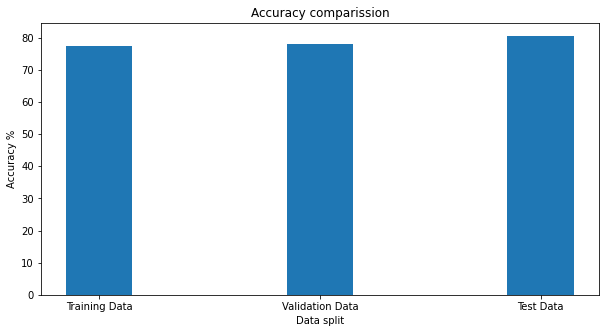

In [21]:
data = {'Training Data':train_accuracy, 'Validation Data':validation_accuracy, 'Test Data':test_accuracy}
Data_split = list(data.keys())
accuracy_split = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(Data_split, accuracy_split,
        width = 0.3)
plt.xlabel("Data split")
plt.ylabel("Accuracy %")
plt.title("Accuracy comparission")
plt.show()